# Atividade: Perceptron Multi Camadas XOR
**INSTITUTO FEDERAL DE MINAS GERIAS**
*Departamento de Engenharia e Computação*

**Professor:** Ciniro Nametala

**Aluno:** Euler Gomes

In [92]:
#importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

In [93]:
#secante hiperbolica ao quadrado (inversa da tangente hiperbolica)
def sech2(u):
    return 1 / np.cosh(u)**2

In [94]:
#dataset
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[-1,1],[1,-1],[1,-1],[-1,1]])

In [95]:
#criar o bias
i1 = 1
i4 = 1
i5 = 1
i8 = 1

In [96]:
#inicialização dos pesos das matrizes Wji
w61 = np.random.uniform() - 0.5
w62 = np.random.uniform() - 0.5
w63 = np.random.uniform() - 0.5
w72 = np.random.uniform() - 0.5
w73 = np.random.uniform() - 0.5
w74 = np.random.uniform() - 0.5
w95 = np.random.uniform() - 0.5
w96 = np.random.uniform() - 0.5
w97 = np.random.uniform() - 0.5
w106 = np.random.uniform() - 0.5
w107 = np.random.uniform() - 0.5
w108 = np.random.uniform() - 0.5

In [97]:
#efinicao de parametros
contador_epocas = 0
tol = 0
erro_epoca_atual = tol + 1
n_amostras = 4

max_epocas = 10000
eta = 0.01
erro_epocas = np.zeros(max_epocas)

In [98]:
#treinamento da rede
while (contador_epocas < max_epocas) and (erro_epoca_atual < max_epocas):
    #exibe contador de epocas
    if contador_epocas % 10 == 0:
        print(f'epoca {contador_epocas}')

    #reseta o erro acumulado da epoca
    erro = 0

    #embaralha indices para apresentacao aleatoria das amostrar
    indices_embaralhados = np.random.permutation(n_amostras)

    for i in range(n_amostras):
        #seleciona um indice
        indices_selecionado = indices_embaralhados[i]

        #obter o conjunto de entrada x e sua respectiva saida y
        xi = x[indices_selecionado]
        yi = y[indices_selecionado]

        #separa componentes da entrada
        i2 = xi[0]
        i3 = xi[1]

        #separa componentes da saida
        y9 = yi[0]
        y10 = yi[1]

        #fase forward
        #calcula ativacao do neuronio 1 da camada
        u6 = i1 * w61 + i2 * w62 + i3 * w63
        i6 = np.tanh(u6)

        #calcula ativacao do neuronio 2 da camada 1
        u7 = i2 * w72 + i3 * w73 + i4 *w74
        i7 = np.tanh(u7)

        #calcula ativacao do neuronio 1 da camada 2
        u9 = i5 * w95 + i6 * w96 + i7 * w97
        i9 = np.tanh(u9)

        #calcula ativacao do neuronio 2 da camada 2
        u10 = i8 * w108 + i7 *w107 + i6 * w106
        i10 = np.tanh(u10)

        #fase backpropagation
        e9 = y9 - i9
        e10 = y10 - i10

        #atualizacao de pesos da camada 2
        #neuronio 1 da camada 2
        #pesos ligados ao neronio 1 da camada 2
        #calcula o gradiente do neuronio 1 da camada 2
        deltinha9 = e9*sech2(u9)

        #calcula ajustes dos pesos do neuronio 1 da camada 2
        deltaw95 = eta * deltinha9 * i5
        deltaw96 = eta * deltinha9 * i6
        deltaw97 = eta * deltinha9 * i7

        #atualizacao dos pesos do neuronio 1 da camada 2
        w95 = w95 + deltaw95
        w96 = w96 + deltaw96
        w97 = w97 + deltaw97

        #neuronio 2 da camada 2
        #pesos ligados ao neuronio 2 da camada 2
        #calcula o gradiente do neuronio 2 da camada 2
        deltinha10 = e10*sech2(u10)

        #calcula o ajustes dos pesos do neuronio 2 da camada 2
        deltaw106 = eta * deltinha10 * i6
        deltaw107 = eta * deltinha10 * i7
        deltaw108 = eta * deltinha10 * i8

        #atualizacao dos pesos ligados ao neuronio 2 da camada 2
        w106 = w106 + deltaw106
        w107 = w107 + deltaw107
        w108 = w108 + deltaw108

        #neuronio 1 da camada 1
        #pesos ligados ao neuronio 1 da camada 1
        #calcula o gradiente do neuronio 1 da camada 1
        deltinha6 = sech2(u6) * ((deltinha9 * w96) + (deltinha10 * w106))

        #calcula ajustes dos pesos do neuronio 1 da camada 1
        deltaw61 = eta * deltinha6 * i1
        deltaw62 = eta * deltinha6 * i2
        deltaw63 = eta * deltinha6 * i3

        #atualiza os pesos do neuronio 1 da camada 1
        w61 = w61 + deltaw61
        w62 = w62 + deltaw62
        w63 = w63 + deltaw63

        #neuronio 2 da camada 1
        #pesos ligados ao neuronio 2 da camada 1
        #calcula o gradiente do neuronio 2 da camada 1
        deltinha7 = sech2(u7) * ((deltinha9 * w97) + (deltinha10 * w107))

        #calcula ajustes dos pesos do neuronio 2 da camada 1
        deltaw72 = eta * deltinha7 * i2
        deltaw73 = eta * deltinha7 * i3
        deltaw74 = eta * deltinha7 * i4

        #atualiza os pesos do neuronio 2 da camada 1
        w72 = w72 + deltaw72
        w73 = w73 + deltaw73
        w74 = w74 + deltaw74

        #calcula o erro acumulado
        erro = erro + (e9**2) + (e10**2)

     #calcula o erro medio da epoca
    erro_epoca_atual = erro / n_amostras

    #armazena no historico de erros
    erro_epocas[contador_epocas] = erro_epoca_atual

    #incrmenta o contados de epocas
    contador_epocas = contador_epocas + 1


epoca 0
epoca 10
epoca 20
epoca 30
epoca 40
epoca 50
epoca 60
epoca 70
epoca 80
epoca 90
epoca 100
epoca 110
epoca 120
epoca 130
epoca 140
epoca 150
epoca 160
epoca 170
epoca 180
epoca 190
epoca 200
epoca 210
epoca 220
epoca 230
epoca 240
epoca 250
epoca 260
epoca 270
epoca 280
epoca 290
epoca 300
epoca 310
epoca 320
epoca 330
epoca 340
epoca 350
epoca 360
epoca 370
epoca 380
epoca 390
epoca 400
epoca 410
epoca 420
epoca 430
epoca 440
epoca 450
epoca 460
epoca 470
epoca 480
epoca 490
epoca 500
epoca 510
epoca 520
epoca 530
epoca 540
epoca 550
epoca 560
epoca 570
epoca 580
epoca 590
epoca 600
epoca 610
epoca 620
epoca 630
epoca 640
epoca 650
epoca 660
epoca 670
epoca 680
epoca 690
epoca 700
epoca 710
epoca 720
epoca 730
epoca 740
epoca 750
epoca 760
epoca 770
epoca 780
epoca 790
epoca 800
epoca 810
epoca 820
epoca 830
epoca 840
epoca 850
epoca 860
epoca 870
epoca 880
epoca 890
epoca 900
epoca 910
epoca 920
epoca 930
epoca 940
epoca 950
epoca 960
epoca 970
epoca 980
epoca 990
epoca 1000


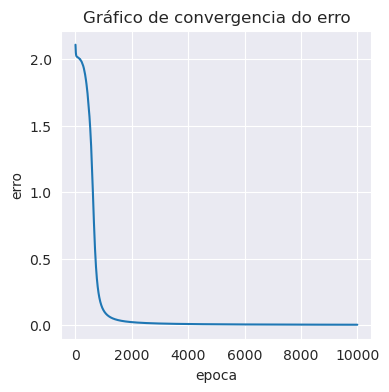

In [99]:
#plota o erro epoca a epoca
plt.figure(figsize=(4, 4))
plt.plot(range(contador_epocas), erro_epocas[:contador_epocas])
plt.title('Gráfico de convergencia do erro')
plt.xlabel("epoca")
plt.ylabel("erro")
plt.grid(True)
plt.show()

In [100]:
#algoritmo de previsao
yhat_mat = np.zeros((4,2))

#para cada amostra no dataset
for i in range(n_amostras):
    print('Classificando a amostra ' + str(i))
    print('Para essa amostra espera-se a saída ' + str(y[i]))

    xi = x[i]
    i2 = xi[0]
    i3 = xi[1]

    yi = y[i]
    y9 = yi[1]
    y10 = yi[0]

    u6 = i1*w61 + i2*w62 + i3*w63
    i6 = np.tanh(u6)

    u7 = i2*w72 + i3*w74 + i4*w74
    i7 = np.tanh(u7)

    u9 = i5+w95 + i6*w96 + i7*w97
    i9 = np.tanh(u9)

    u10 = i6*w106 + i7*w107 + i8*w108
    i10 = np.tanh(u10)

    yhat_mat[i,0] = i9
    yhat_mat[i,1] = i10



Classificando a amostra 0
Para essa amostra espera-se a saída [-1  1]
Classificando a amostra 1
Para essa amostra espera-se a saída [ 1 -1]
Classificando a amostra 2
Para essa amostra espera-se a saída [ 1 -1]
Classificando a amostra 3
Para essa amostra espera-se a saída [-1  1]


In [103]:
#resultado final
mat_final = np.column_stack((y, yhat_mat))
print("\nx1\tx2\tyhat1\t\tyhat2")
for linha in mat_final:
    print(f"{linha[0]:.3f}\t{linha[1]:.3f}\t{linha[2]:.6f}:.\t{linha[3]:.6f}")


x1	x2	yhat1		yhat2
-1.000	1.000	-0.788167:.	0.967916
1.000	-1.000	-0.939768:.	0.991443
1.000	-1.000	0.994514:.	-0.959506
-1.000	1.000	-0.886934:.	0.983596
